# 3: Command Line Usage

PATATO can be used in the command line. The example below demonstrates a typical way you can import MSOT data and process it.

Make sure to edit the file paths below to the appropriate folder.

Example data can be found in our example data repository [here](https://doi.org/10.17863/CAM.93181).

```shell
$ patato-import-ithera "/path/to/myitheradata" "/path/to/myprocesseddata"
WORKING ON Scan_1
$ patato-set-speed-of-sound
** interface is shown here, set speed of sound in GUI **
$ patato-reconstruct "/path/to/myprocesseddata"
$ patato-unmix "/path/to/myprocesseddata"
$ patato-draw-roi
** interface is shown here, draw region of interest **
```

Once this processing has been done in the command line, you can then extract metrics in Python like so:

In [1]:
import patato as pat
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pa = pat.PAData.from_hdf5("../intro/dataset/invivo_oe.hdf5")

roi = pa.get_rois()["tumour_right", "0"]

In [3]:
# Set a default reconstruction image
pa.set_default_recon()

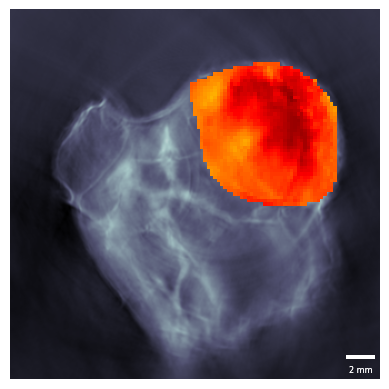

In [4]:
# We can visualise the so2 on top of the reconstructions
r = pa.get_scan_reconstructions()
s = pa.get_scan_so2()

fig, ax = plt.subplots()
r.imshow(roi_mask=roi, mask_roi=False, ax=ax)
s.imshow(roi_mask=roi, mask_roi=True, clim=(0,1), ax=ax, cmap="hot")
plt.show()

In [5]:
# Spectra can be extracted like so:

mask, recon_slice = roi.to_mask_slice(r)

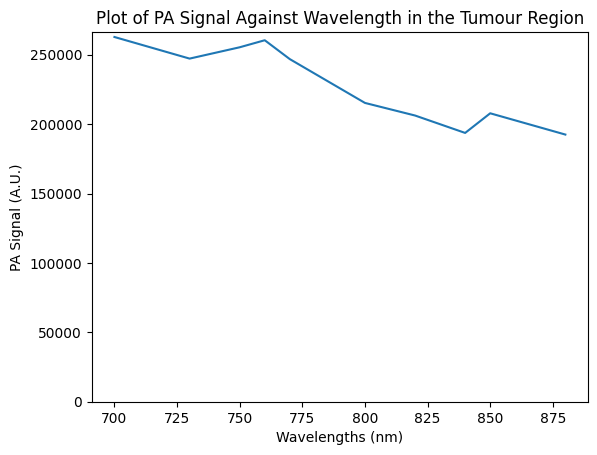

In [6]:
mask_applied = recon_slice.raw_data[0].T[mask.T]
plt.plot(pa.get_wavelengths(), np.mean(mask_applied, axis=0))
plt.xlabel("Wavelengths (nm)")
plt.ylabel("PA Signal (A.U.)")
plt.title("Plot of PA Signal Against Wavelength in the Tumour Region")
plt.ylim([0, None])
plt.show()